# <p style="text-align: center;"> <b> Data Pre-Processing and Exploration </b></p>

## Table of Contents


---

# 1. Introduction <a class="anchor" id="introduction"></a>

## 1.1 Requirements <a class="anchor" id="requirements"></a>

# 2. Implementation <a class="anchor" id="implementation"></a>

## Import libraries <a class="anchor" id="import_libraries"></a>

These are the main libraries used for data exploration:
+ `numpy`: used for mathematical operations on matrices
+ `pandas`: used to store data from `.csv` files and operate functions on DataFrame
+ `matplotlib`: used to visualize data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re
import pandas as pd
import numpy as np
from dateutil.parser import parse
from datetime import datetime
import datetime as dt
pd.options.mode.chained_assignment = None

## Exploring Data (rows, cols, dtype) <a class="anchor" id="Exploring Data (rows, cols, dtype)"></a>

### Read data from file `.csv` <a class="anchor" id="Exploring Data (rows, cols, dtype)"></a>

In [2]:
manga_df = pd.read_csv('../data/raw_comic.csv')

In [3]:
manga_df.head()

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Status,Published,Genres,Themes,Author,Total Review,Type Review
0,Berserk,9.47,331288,1,1,"665,300","122,841",Unknown,Unknown,Publishing,"Aug 25, 1989 to ?","['Action', 'Adventure', 'Award Winning', 'Dram...","['Gore', 'Military', 'Mythology', 'Psychologic...","Miura, Kentarou (Story & Art), Studio Gaga (Art)",258,"[233, 15, 10]"
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,156368,2,26,"256,146","42,864",24,96,Finished,"Jan 19, 2004 to Apr 19, 2011","['Action', 'Adventure', 'Mystery', 'Supernatur...",[],"Araki, Hirohiko (Story & Art)",128,"[120, 7, 1]"
2,Vagabond,9.24,136403,3,15,"364,891","40,158",37,327,On Hiatus,"Sep 3, 1998 to May 21, 2015","['Action', 'Adventure', 'Award Winning']","['Historical', 'Samurai']","Inoue, Takehiko (Story & Art), Yoshikawa, Eiji...",97,"[88, 8, 1]"
3,One Piece,9.22,366668,4,3,"599,278","114,531",Unknown,Unknown,Publishing,"Jul 22, 1997 to ?","['Action', 'Adventure', 'Fantasy']",[],"Oda, Eiichiro (Story & Art)",206,"[173, 17, 16]"
4,Monster,9.15,93945,5,29,"236,355","20,501",18,162,Finished,"Dec 5, 1994 to Dec 20, 2001","['Award Winning', 'Drama', 'Mystery']","['Adult Cast', 'Psychological']","Urasawa, Naoki (Story & Art)",76,"[64, 7, 5]"


### Total number of rows and columns of data <a class="anchor" id="Exploring Data (rows, cols, dtype)"></a>

In [4]:
n_rows , n_cols = manga_df.shape
print(f'Data has {n_rows} rows and {n_cols} columns')

Data has 10000 rows and 16 columns


### Meaning of each row and each column <a class="anchor" id="collect_urls"></a>

+ Each rows represents information about a manga series

+ The following is the meaning of each column in the data

  | **COLUMN**            | **MEANING**                                                                                     |
  |:----------------------|:------------------------------------------------------------------------------------------------|
  |**`Title`**            | Title of the manga (written in English phonetic)                                                |
  |**`Score`**            | Score on the MyAnimeList site (MAL)                                                             |
  |**`Vote`**             | Number of readers voting for the manga                                                          |
  |**`Ranked`**           | Ranking of manga on the web MyAnimeList (MAL)                                                   |
  |**`Popularity`**       | The popularity of the manga                                                                     |
  |**`Members`**          | Number of readers who have this manga in their list                                             |
  |**`Favorite`**         | Number of readers who love this manga                                                           |
  |**`Volumes`**          | Volume number of the manga                                                                      |
  |**`Chapters`**         | Chapter number of the manga                                                                     |
  |**`Status`**           | Status of the manga (ongoing, completed, on hiatus,...)                                         |
  |**`Published`**        | Release time to the end time of the manga                                                       |
  |**`Genres`**           | Genres of manga                                                                                 |
  |**`Themes`**           | The themes of the manga                                                                         |
  |**`Author`**           | Author information of the manga                                                                 |
  |**`Total Review`**     | Number of readers leaving comments on the manga                                                 |
  |**`Type Review`**      | Number of readers for each comment category (Recommended / Mixed feeling / Not recommended)     |
  

### Check and handle duplicates <a class="anchor" id="Exploring Data (rows, cols, dtype)"></a>

In [5]:
duplicated_rows = manga_df.duplicated().sum()

if duplicated_rows == 0:
    print('There are 0 rows that are duplicated, which means each row in the DataFrame is unique.')
    print('So that we do not need to continue processing duplicate lines')
else:
    print(f'There are {duplicated_rows} rows that are duplicated so we need to drop those {duplicated_rows} rows')
    manga_df = manga_df.drop_duplicates()

There are 1 rows that are duplicated so we need to drop those 1 rows


### Check and handle data type of columns <a class="anchor" id="Exploring Data (rows, cols, dtype)"></a>

Next, we calculate the data type (dtype) of each column in DataFrame `manga_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [6]:
dtypes = manga_df.dtypes
dtypes

Title            object
Score           float64
Vote              int64
Ranked            int64
Popularity        int64
Members          object
Favorite         object
Volumes          object
Chapters         object
Status           object
Published        object
Genres           object
Themes           object
Author           object
Total Review      int64
Type Review      object
dtype: object

To better understand columns of type `object`, we will analyze them into each subtype using function `open_object_dtype()`

In [7]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return dtypes

Now, considering columns whose data type is object more clearly

In [8]:
manga_df[manga_df.dtypes.index[manga_df.dtypes == object]].apply(open_object_dtype)

Title                           {<class 'str'>}
Members                         {<class 'str'>}
Favorite                        {<class 'str'>}
Volumes                         {<class 'str'>}
Chapters                        {<class 'str'>}
Status                          {<class 'str'>}
Published                       {<class 'str'>}
Genres                          {<class 'str'>}
Themes                          {<class 'str'>}
Author         {<class 'str'>, <class 'float'>}
Type Review                     {<class 'str'>}
dtype: object

Let's see which columns have appropriate data types and which columns do not

+ Suitability: `Title`, `Score`, `Vote`, `Ranked`, `Popularity`, `Status` and `Total Review`

+ Need to convert to **int**: `Members`, `Favorite`, `Volumes` and `Chapters`

+ Need to convert to **list**: `Type Review`, `Genres` and `Themes`

+ Need to convert to **str**: `Author` 

+ Need to convert to **datetime**: `Published`

## Pre-processing data <a class="anchor" id="Pre-processing data"></a>

### Normalizing columns (convert the data types of columns accordingly) <a class="anchor" id="Pre-processing data"></a>

Firstly, converting the data type of the columns to **int / float**

In [9]:
# Convert to int
manga_df['Members'].replace(',','', regex=True, inplace=True)
manga_df['Favorite'].replace(',','', regex=True, inplace=True)
manga_df['Members'] = pd.to_numeric(manga_df['Members'], errors='coerce')
manga_df['Favorite'] = pd.to_numeric(manga_df['Favorite'], errors='coerce')

# Convert to float because type int does not contain NaN values
manga_df['Volumes'] = pd.to_numeric(manga_df['Volumes'], errors='coerce')
manga_df['Chapters'] = pd.to_numeric(manga_df['Chapters'], errors='coerce')


Let's check again data type of `Members`, `Favorite`, `Volumes` and `Chapters`

In [10]:
check = ['Members', 'Favorite', 'Volumes', 'Chapters']
manga_df[check].dtypes

Members       int64
Favorite      int64
Volumes     float64
Chapters    float64
dtype: object

Secondly, converting the data type of the columns to **list**

In [11]:
manga_df[['Genres', 'Themes', 'Type Review']] = \
    manga_df[['Genres', 'Themes', 'Type Review']].apply(lambda col : col.apply(ast.literal_eval), axis=1)

+ Looking at the `Type Review` column, we see that the data type of this column is quite difficult to access (the column's data type is a list of 3 numbers representing the number of comments of three comment types: `Recommended`, `Mixed feelings` and `Not recommended`) so we will divide `Type Review` into 3 new columns: `Recommended`, `Mixed Feelings` and `Not Recommended`. 
+ After dividing into 3 new columns, the `Type Review` column will be removed from the data. 
+ Additionally, the `Total Review` column which is the sum of those 3 new columns will also be removed

In [12]:
manga_df['Recommended'] = 0
manga_df['Mixed Feelings'] = 0
manga_df['Not Recommended'] = 0

for row, i in zip(manga_df['Type Review'], manga_df.index):
    manga_df['Recommended'][i] = row[0]
    manga_df['Mixed Feelings'][i] = row[1]
    manga_df['Not Recommended'][i] = row[2]

Before deleting column `Total Review`, we check whether the data collected is reasonable

In [13]:
def checking_reviews(df: pd.DataFrame) -> bool:
    return df["Total Review"].equals((df["Recommended"] + df["Mixed Feelings"] + df["Not Recommended"]))

In [14]:
checking_reviews(manga_df)==True

True

Because the `Total Review` column is the sum of the 3 columns we just created (checked to be True above), we will delete the `Total Review` column from the data.

In [15]:
manga_df = manga_df.drop(columns=['Type Review', 'Total Review'])

Let's check the data type of the 3 newly created columns

In [16]:
check = ['Recommended', 'Mixed Feelings', 'Not Recommended']
manga_df[check].dtypes

Recommended        int64
Mixed Feelings     int64
Not Recommended    int64
dtype: object

Thirdly, converting the data type of the columns to **datetime**

Because the `Published` column is quite difficult to store during discovery and continuing with the following steps (the data in the column is `release date to end date`), we will split the `Published` column into 2 new columns. is column `Release date` and column `Completed date` and remove column `Published`

In [17]:
start = []
end = []

for row in manga_df['Published']:
    if ' to ' in row:
        s, e = row.split(' to ')

        if s.isdigit() and e.isdigit():
            s = f"01 Jan, {s}"
            e = f"01 Jan, {e}"
        elif len(s.split()) == 2 and len(e.split()) == 2:
            s = f"{s}, {datetime.now().year}"
            e = f"{e}, {datetime.now().year}"

    elif row.isdigit():
        s = f"01 Jan, {row}"
        e = np.nan
    else:
        try:
            s = parse(row, fuzzy=True)
            e = np.nan
        except ValueError:
            s = np.nan
            e = np.nan

    start.append(s)
    end.append(e)

date_df = pd.DataFrame({'Release date': start, 'Completed date': end})

# Assigning the new columns to manga_df
manga_df['Release date'] = date_df['Release date']
manga_df['Completed date'] = date_df['Completed date']

# Convert 'Release date' and 'Completed date' to datetime64 and set time to midnight
manga_df['Release date'] = pd.to_datetime(manga_df['Release date'], errors='coerce').dt.normalize()
manga_df['Completed date'] = pd.to_datetime(manga_df['Completed date'], errors='coerce').dt.normalize()

# Dropping the original 'Published' column
manga_df = manga_df.drop(columns='Published')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21600\4275699570.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  manga_df['Completed date'] = pd.to_datetime(manga_df['Completed date'], errors='coerce').dt.normalize()


In [18]:
manga_df['Release date']

0      1989-08-25
1      2004-01-19
2      1998-09-03
3      1997-07-22
4      1994-12-05
          ...    
9995   2013-12-13
9996   2012-08-18
9997   2013-10-24
9998   2014-10-27
9999          NaT
Name: Release date, Length: 9999, dtype: datetime64[ns]

Let's data type of `Release date` and `Completed date`

In [19]:
check = ['Release date', 'Completed date']
manga_df[check].dtypes

Release date      datetime64[ns]
Completed date    datetime64[ns]
dtype: object

In [20]:
def calculate_time_from_release(row):
    today_date = datetime.now()
    
    # Convert string dates back to datetime objects
    try:
        release_date = pd.to_datetime(row['Release date'], format='%d-%m-%Y')
    except ValueError:
        # If conversion fails, return 0
        return 0

    try:
        complete_date = pd.to_datetime(row['Completed date'], format='%d-%m-%Y')
    except ValueError:
        complete_date = np.nan

    if pd.isna(release_date):
        # If release date is NaN (or conversion failed), we cannot calculate time from release
        return 0

    if pd.isna(complete_date):
        # Calculate from release date to today if complete date is NaN or conversion failed
        result = (today_date - release_date).days / 30.44
    else:
        result = (complete_date - release_date).days / 30.44

    return int(round(result))

# Apply the function
manga_df['Time from release (months)'] = manga_df.apply(calculate_time_from_release, axis=1)

In [21]:
manga_df

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Status,Genres,Themes,Author,Recommended,Mixed Feelings,Not Recommended,Release date,Completed date,Time from release (months)
0,Berserk,9.47,331288,1,1,665300,122841,NaN,NaN,Publishing,"[Action, Adventure, Award Winning, Drama, Fant...","[Gore, Military, Mythology, Psychological]","Miura, Kentarou (Story & Art), Studio Gaga (Art)",233,15,10,1989-08-25,NaT,411
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,156368,2,26,256146,42864,24.0,96.0,Finished,"[Action, Adventure, Mystery, Supernatural]",[],"Araki, Hirohiko (Story & Art)",120,7,1,2004-01-19,2011-04-19,87
2,Vagabond,9.24,136403,3,15,364891,40158,37.0,327.0,On Hiatus,"[Action, Adventure, Award Winning]","[Historical, Samurai]","Inoue, Takehiko (Story & Art), Yoshikawa, Eiji...",88,8,1,1998-09-03,2015-05-21,201
3,One Piece,9.22,366668,4,3,599278,114531,NaN,NaN,Publishing,"[Action, Adventure, Fantasy]",[],"Oda, Eiichiro (Story & Art)",173,17,16,1997-07-22,NaT,316
4,Monster,9.15,93945,5,29,236355,20501,18.0,162.0,Finished,"[Award Winning, Drama, Mystery]","[Adult Cast, Psychological]","Urasawa, Naoki (Story & Art)",64,7,5,1994-12-05,2001-12-20,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Mikagura Gakuen Kumikyoku (Mikagura School Sui...,6.91,218,9860,11610,1354,12,6.0,31.0,Finished,"[Action, Comedy]","[School, Visual Arts]","Sayuki (Art), Last Note. (Story)",0,0,0,2013-12-13,2014-11-13,11
9996,Stella to Mille Feuille,6.91,1068,9861,5919,3158,5,3.0,12.0,Finished,[],[],"Watanabe, Kana (Story & Art)",0,2,0,2012-08-18,2021-12-18,112
9997,Stella no Mahou (Magic of Stella),6.91,137,9862,14815,954,9,10.0,NaN,Finished,"[Comedy, Slice of Life]","[CGDCT, School]",cloba.U (Story & Art),0,0,0,2013-10-24,NaT,121
9998,NEET dakedo Hello Work ni Ittara Isekai ni Tsu...,6.91,302,9863,9688,1739,14,NaN,NaN,Publishing,"[Action, Comedy, Fantasy, Romance]","[Harem, Isekai]","Sameda, Koban (Art), Katsura, Kasuga (Story)",0,0,0,2014-10-27,NaT,109


Finally, converting the data type of the columns to **string**

In [22]:
# Converted to str, any value that is str remains the same and any value that is NaN is converted to an empty string
manga_df['Author'] = manga_df['Author'].replace(to_replace=np.nan, value='')

To standardize the author names in the dataset, we should use the function `extract_author_name()`. This function will ensure a consistent format for author names, regardless of the various styles they may have initially.

In [23]:
def extract_author_names(text):
    # Remove roles within parentheses, including the parentheses
    text = re.sub(r'\s*\([^)]*\)', '', text)
    # Replace the commas separating last names from first names with a space
    text = re.sub(r',\s', ' ', text)
    # Split the string by a comma followed by a space, which now only occurs between individuals
    return text.split(', ')

# Apply the function to each row in the 'Author' column
manga_df['Author'] = manga_df['Author'].apply(extract_author_names)

Now, checking all data type columns after conversion

In [24]:
manga_df.apply(open_object_dtype)

Title                                                           {<class 'str'>}
Score                                                         {<class 'float'>}
Vote                                                            {<class 'int'>}
Ranked                                                          {<class 'int'>}
Popularity                                                      {<class 'int'>}
Members                                                         {<class 'int'>}
Favorite                                                        {<class 'int'>}
Volumes                                                       {<class 'float'>}
Chapters                                                      {<class 'float'>}
Status                                                          {<class 'str'>}
Genres                                                         {<class 'list'>}
Themes                                                         {<class 'list'>}
Author                                  

## Exploring data (distribution of values) <a class="anchor" id="Exploring data (distribution of values)"></a>

### Distribution of numeric columns <a class="anchor" id="Exploring data (distribution of values)"></a>

Columns have numeric data types: 
+ `Score`
+ `Vote`
+ `Ranked`
+ `Popularity`
+ `Members`
+ `Favorite`
+ `Volumes`
+ `Chapters`
+ `Recommended`
+ `Mixed Feelings`
+ `Not Recommended`
+ `Release date`
+ `Completed date`

For columns with numeric data types, we will calculate:
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile 
- The median 
- The upper quartile 
- The max

We will save the results to a DataFrame `num_col_dist_df`, where:
- The names of the columns are the names of the numeric columns in `manga_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  


In [25]:
num_col_dist_df = manga_df[['Score','Vote','Ranked','Popularity','Members','Favorite','Volumes','Chapters','Recommended','Mixed Feelings','Not Recommended', 'Release date', 'Completed date']]

missing_percentage = num_col_dist_df.isna().mean() * 100

num_col_dist_df = num_col_dist_df.describe(percentiles=[.25, .5, .75])

num_col_dist_df.loc['missing ratios'] = missing_percentage

num_col_dist_df

,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Recommended,Mixed Feelings,Not Recommended,Release date,Completed date
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,7367.000000,7466.000000,9999.000000,9999.00000,9999.000000,8379,6192
mean,7.367636,3482.801880,5000.799780,8707.675868,8762.561056,346.272127,6.646803,47.816635,2.946895,0.50465,0.308131,2012-02-15 20:01:58.582169856,2012-06-18 10:11:37.674418688
min,6.910000,101.000000,1.000000,1.000000,193.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1950-01-15 00:00:00,1951-02-20 00:00:00
25%,7.080000,316.000000,2500.500000,3099.500000,1127.000000,6.000000,2.000000,8.000000,0.000000,0.00000,0.000000,2008-02-22 00:00:00,2008-12-08 18:00:00
50%,7.280000,786.000000,5000.000000,7345.000000,2465.000000,19.000000,4.000000,23.000000,1.000000,0.00000,0.000000,2013-04-05 00:00:00,2013-10-27 00:00:00
75%,7.560000,2232.500000,7501.500000,13222.000000,6349.000000,74.000000,9.000000,56.000000,3.000000,0.00000,0.000000,2018-02-27 12:00:00,2018-05-01 06:00:00
max,9.470000,400404.000000,10004.000000,33358.000000,665300.000000,122841.000000,200.000000,1957.000000,280.000000,56.00000,112.000000,2023-11-27 00:00:00,2023-11-27 00:00:00
std,0.378047,13940.433196,2887.483754,6663.591423,27600.905793,2732.543168,8.238083,77.789013,9.038939,1.94389,1.851229,NaN,NaN
missing ratios,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.322632,25.332533,0.000000,0.00000,0.000000,16.20162,38.073807


As we can see:
+ About missing percentage:
    + All columns except `Volumes` and `Chapters` have full data
    
    + The column `Volumes` has **26.3%** of the total values missing. While the `Chapters` column is **25.3%**. It can be seen that the missing rate of these two columns is not too high and is acceptable. Columns `Volumes` and `Chapters` are missing mainly due to their `Status` (incomplete, on hold, on hiatus,...), because these two columns only display volume and chapter numbers when that set has ended (completed or stopped indefinitely).
    
    + `Release date` is missing **16.2%** of the data, likely because the information is not available or the manga has not been released yet.
    
     + `Completed date` is missing a lot, more than **38.07%**. The reason may be that the manga is not completed or there is no information.
     
+ About min, median (50%), lower quartile (25%), upper quartile (75%) and max:
     + Except for the `Score` column, numeric columns all have very wide ranges
     
     + The manga series in the data were all released between December 1962 and November 2023.
     
     + If the manga series in the data have been completed, they were all completed between May 1966 and November 2023.

In [26]:
# Missing manga volume number column grouped by status
np.unique(manga_df['Status'][manga_df['Volumes'].isna()], return_counts=True)

(array(['Discontinued', 'Finished', 'On Hiatus', 'Publishing'],
       dtype=object),
 array([   2,  632,    7, 1991], dtype=int64))

In [27]:
# Missing manga chapter number column grouped by status
np.unique(manga_df['Status'][manga_df['Chapters'].isna()], return_counts=True)

(array(['Discontinued', 'Finished', 'On Hiatus', 'Publishing'],
       dtype=object),
 array([   1,  524,   18, 1990], dtype=int64))

+ As mentioned above, the manga is missing chapters or volumes because it is not yet completed and are in progress (Publishing). `Chapters` and `Volumes` will be updated when the manga is completed or discontinued.

+ For manga that only have 'Chapters' but no 'Volumes', the biggest reason is one-shot manga series (series with only 1 chapter) so there will be no volumes. Such one-shot manga make up a large proportion on MAL.

+ For manga that only have 'Volumes' but no 'Chapters', the biggest reason is that light novels (light_novels or novels) are often published in volumes and the author does not divide chapters when writing. There are also many novel series on MAL.

Next, after identifying the basic statistical numbers that describe our data, we further need to determine the features that have a large number of missing values. Such features are not useful for the analysis stage and must be removed from the dataset.

We decided that if the percentage of missing values is greater than 75%, the column is dropped from the dataframe and an updated dataframe is returned.

In [28]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_dist_df.iloc[0]), threshold: float = 75.0) -> pd.DataFrame:
    if (df is None) or (missing_lst is None) or (threshold is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # List to maintain the columns to drop
    cols_to_trim = []
    
    for key, value in missing_lst.items():
        if float(value) > threshold:
            cols_to_trim.append(key)
            
    if len(cols_to_trim) > 0:
        # drop the columns identified using the dataframe drop() method
        df_cp = df_cp.drop(columns=cols_to_trim)
        print("[LOG] Dropped columns: " + " ".join(cols_to_trim))
    else:
        print("[LOG] Have no columns to trim.")
        
    return df_cp

In [29]:
manga_df = drop_missing_features(manga_df, dict(num_col_dist_df.loc['missing ratios']))

[LOG] Have no columns to trim.


After remove features which have large missing values, our dataframe still have missing values. So that, we need to fill these missing values so that they can be used in analysis.

We fill these missing values with the **median** of the column values.

In [30]:
def filling_missing_value(df: pd.DataFrame) -> pd.DataFrame:
    if (df is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # Get the list of columns in the dataframe
    cols_list = list(df_cp.columns)
    
    # Exclude the last column - Country, Year
    cols_list.remove("Title")
    cols_list.remove("Status")
    cols_list.remove("Genres")
    cols_list.remove("Themes")
    cols_list.remove("Author")
    cols_list.remove("Release date")
    cols_list.remove("Completed date")
    
    # Replace all None values with NaN, fillna only works on nans
    df_cp.fillna(value=np.nan, inplace=True)
    
    # Replace all NaN values with the median of the column values
    for col in cols_list:
        df_cp[col].fillna((df_cp[col].median()), inplace=True)
        
    return df_cp

In [31]:
manga_df = filling_missing_value(df=manga_df)

## Distribution of non-numeric columns <a class="anchor" id="Distribution of non-numeric columns"></a>

Columns have non-numeric data types: 

+ `Title`
+ `Status`
+ `Genres`
+ `Themes`
+ `Author`


For columns with non-numeric data types, we calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values)
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values)


### Considering columns of type string:  `Title`, `Status`, `Author` <a class="anchor" id="Distribution of non-numeric columns"></a>

In [32]:
str_col_dist_df = pd.DataFrame({'Title': [.0] * 3,
                                'Status': [.0] * 3,
                                'Author': [.0] * 3},
                                index=['Missing_ratio', 'Num_diff_vals', 'Diff_vals'], dtype=object)

def get_num_diff_vals(column):
    # Convert lists in the column to tuples
    non_empty_values = column[column != ''].apply(lambda x: tuple(x) if isinstance(x, list) else x)
    return non_empty_values.nunique()

str_col_dist_df.loc['Num_diff_vals'] = manga_df[str_col_dist_df.columns].apply(get_num_diff_vals)
str_col_dist_df.loc['Diff_vals'] = manga_df[str_col_dist_df.columns].apply(lambda col: col[col != ''].apply(lambda x: tuple(x) if isinstance(x, list) else x).unique())
str_col_dist_df.loc['Missing_ratio'] = np.sum(manga_df[str_col_dist_df.columns] == '', axis=0) / manga_df.shape[0] * 100
str_col_dist_df

,Title,Status,Author
Missing_ratio,0.0,0.0,0.0
Num_diff_vals,9684,4,6231
Diff_vals,"[Berserk, JoJo no Kimyou na Bouken Part 7: Ste...","[Publishing, Finished, On Hiatus, Discontinued]","[(Miura Kentarou Studio Gaga,), (Araki Hirohik..."


*General views:*

+ About Missing_ratio:
     + The `Title` column, `Author` column and `Status` column have full data
     
+ About Num_diff_vals and Diff_vals:
     + There are still manga series with duplicate titles because the Num_diff_vals of the `Title` column is 9685 while there are 10000 lines of data and this column is not missing data.
     + The `Author` column still has overlap.
     + The `Status` column includes 4 status: Publishing, Finished, On Hiatus, Discontinued

In [33]:
manga_df = manga_df.replace('', np.nan).dropna(subset=['Author'])

**`Tittle`** has 170 most appearances

In [34]:
manga_df[['Title']].mode()

,Title
0,Clover


**`Status`** finished is the most common

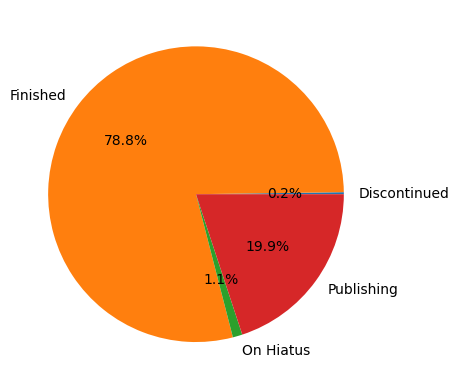

In [35]:
plt.pie(manga_df.groupby('Status')['Status'].count().values, labels=manga_df.groupby('Status')['Status'].count().index, autopct = '%.1f%%');

The most frequently appearing **`Author`** is Tezuka, Osamu (Story & Art)

In [36]:
manga_df[['Author']].mode()

,Author
0,[Tezuka Osamu]


### Considering columns of type list:  `Genres`, `Themes` <a class="anchor" id="Distribution of non-numeric columns"></a>

With the columns representing the classification and each row in that column will be a list (combination of classifications), we will concatenate the lists (in each column) together and use unique to calculate the `diff_vals` for each column, `num_diff_vals` will be the length of the calculated `diff_vals` and `missing_ratio` will be the ratio of rows with empty lists for each column

In [37]:
list_col_dist_df = pd.DataFrame({'Genres': [.0] * 3,
                                 'Themes': [.0] * 3},
                                  index=['Missing_ratio', 'Num_diff_vals', 'Diff_vals'], dtype=object)

for col in ['Genres', 'Themes']:
    manga_df[col] = manga_df[col].apply(lambda x: x if isinstance(x, list) else [])

# Concatenate and find unique values
list_col_dist_df.loc['Diff_vals'][['Genres', 'Themes']] = \
    manga_df[['Genres', 'Themes']].apply(lambda col: np.unique(np.concatenate(col.values)))

# Calculate the number of different values
list_col_dist_df.loc['Num_diff_vals'][['Genres', 'Themes']] = list_col_dist_df.loc['Diff_vals'][['Genres', 'Themes']].apply(len)

list_col_dist_df.loc['Missing_ratio'] = manga_df[['Genres', 'Themes']].apply(lambda col: (col.apply(lambda x: len(x) == 0)).mean() * 100)


list_col_dist_df

,Genres,Themes
Missing_ratio,27.142714,82.19822
Num_diff_vals,19,52
Diff_vals,"[Action, Adventure, Avant Garde, Award Winning...","[Adult Cast, Anthropomorphic, CGDCT, Childcare..."


*General view:*

+ About Missing_ratio:
     + `Genres` is missing a lot of data, missing **27.13%** of the data
     + `Themes` is missing a lot of data, up to **82.21%** of the data
    
+ About Num_diff_vals, Diff_vals:
     + `Genres` has 19 types
     + `Themes` has 52 types

The missing data rate of the `Themes` column is **82.21%** (greater than 75%), so we will proceed to remove this column from the data.

In [38]:
manga_df = manga_df.drop(columns='Themes')

The missing data rate of the `Genres` column is **27.13%** so we will drop rows with no values in columns named `Genres`.

In [39]:
manga_df = manga_df[manga_df['Genres'].apply(lambda x: len(x) > 0)]
manga_df = manga_df.dropna(subset=['Genres'])

### Considering columns of type list:  `Release date`, `Completed date` <a class="anchor" id="Distribution of non-numeric columns"></a>

Due to the numerous distinct values in both the `Release date` and `Completed date`, the specific differences between these values are not crucial. Our focus is solely on computing the missing ratio without considering the variations in the values.

In [40]:
date_col_dist_df = manga_df[['Release date', 'Completed date']]

# Calculate missing ratios for each column
missing_percentage = date_col_dist_df.isna().mean() * 100

# Display the missing ratios
print(missing_percentage)

Release date      15.881949
Completed date    36.760467
dtype: float64


The elevated rate of missing values in the **`Completed date`** column, amounting to **38.07%**, poses a risk to the accuracy and reliability of predictive models when imputation is applied. Recognizing the potential drawbacks linked to attempting to fill in these gaps, it is prudent to opt for the exclusion of this column during the data preprocessing stage.

In [41]:
manga_df = manga_df.drop(columns=['Completed date'])

The missing data rate of the `Release date` column is **16.2%** so we will drop rows with no values in columns named `Release date`.

In [42]:
manga_df = manga_df.dropna(subset=['Release date'])

Let's check data after deleting rows and columns.

In [43]:
manga_df.head(10)

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Status,Genres,Author,Recommended,Mixed Feelings,Not Recommended,Release date,Time from release (months)
0,Berserk,9.47,331288,1,1,665300,122841,4.0,23.0,Publishing,"[Action, Adventure, Award Winning, Drama, Fant...",[Miura Kentarou Studio Gaga],233,15,10,1989-08-25,411
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,156368,2,26,256146,42864,24.0,96.0,Finished,"[Action, Adventure, Mystery, Supernatural]",[Araki Hirohiko],120,7,1,2004-01-19,87
2,Vagabond,9.24,136403,3,15,364891,40158,37.0,327.0,On Hiatus,"[Action, Adventure, Award Winning]",[Inoue Takehiko Yoshikawa Eiji],88,8,1,1998-09-03,201
3,One Piece,9.22,366668,4,3,599278,114531,4.0,23.0,Publishing,"[Action, Adventure, Fantasy]",[Oda Eiichiro],173,17,16,1997-07-22,316
4,Monster,9.15,93945,5,29,236355,20501,18.0,162.0,Finished,"[Award Winning, Drama, Mystery]",[Urasawa Naoki],64,7,5,1994-12-05,84
5,Slam Dunk,9.09,73590,6,56,163879,15514,31.0,276.0,Finished,"[Award Winning, Sports]",[Inoue Takehiko],50,1,1,1990-09-18,69
6,Vinland Saga,9.06,124743,7,19,292677,32273,4.0,23.0,Publishing,"[Action, Adventure, Award Winning, Drama]",[Yukimura Makoto],62,9,10,2005-04-13,224
7,Fullmetal Alchemist,9.03,155123,8,20,288467,29914,27.0,116.0,Finished,"[Action, Adventure, Award Winning, Drama, Fant...",[Arakawa Hiromu],54,0,2,2001-07-12,110
9,Oyasumi Punpun (Goodnight Punpun),9.01,174657,10,9,426786,50732,13.0,147.0,Finished,"[Drama, Slice of Life]",[Asano Inio],205,31,25,2007-03-15,80
10,Kingdom,9.00,59861,11,52,165698,14686,4.0,23.0,Publishing,"[Action, Award Winning]",[Hara Yasuhisa],42,3,1,2006-01-26,214


**`Genres`** Romance is the most popular genre, accounting for **15.44%** (based on the number of appearances in all column lists)

In [44]:
all_genres = np.concatenate(manga_df['Genres'].dropna().tolist())

genres, counts_genres = np.unique(all_genres, return_counts=True)

most_common_genre = genres[counts_genres.argmax()]
most_common_genre_percentage = counts_genres[counts_genres.argmax()] / np.sum(counts_genres) * 100

most_common_genre, most_common_genre_percentage

('Romance', 15.0409175079147)

## Top 10 manga based on Score

The purpose of asking for the `Top 10 manga based on Score` is likely to seek recommendations for high-quality manga titles that have received positive reviews or high scores from critics, readers, or community platforms. The term `Score` could refer to ratings or reviews assigned by users, critics, or aggregators on websites dedicated to manga.

In [45]:
top_10_manga = manga_df.nlargest(10, 'Score')
print(top_10_manga[['Title', 'Score','Ranked']])

                                              Title  Score  Ranked
0                                           Berserk   9.47       1
1   JoJo no Kimyou na Bouken Part 7: Steel Ball Run   9.30       2
2                                          Vagabond   9.24       3
3                                         One Piece   9.22       4
4                                           Monster   9.15       5
5                                         Slam Dunk   9.09       6
6                                      Vinland Saga   9.06       7
7                               Fullmetal Alchemist   9.03       8
9                 Oyasumi Punpun (Goodnight Punpun)   9.01      10
10                                          Kingdom   9.00      11


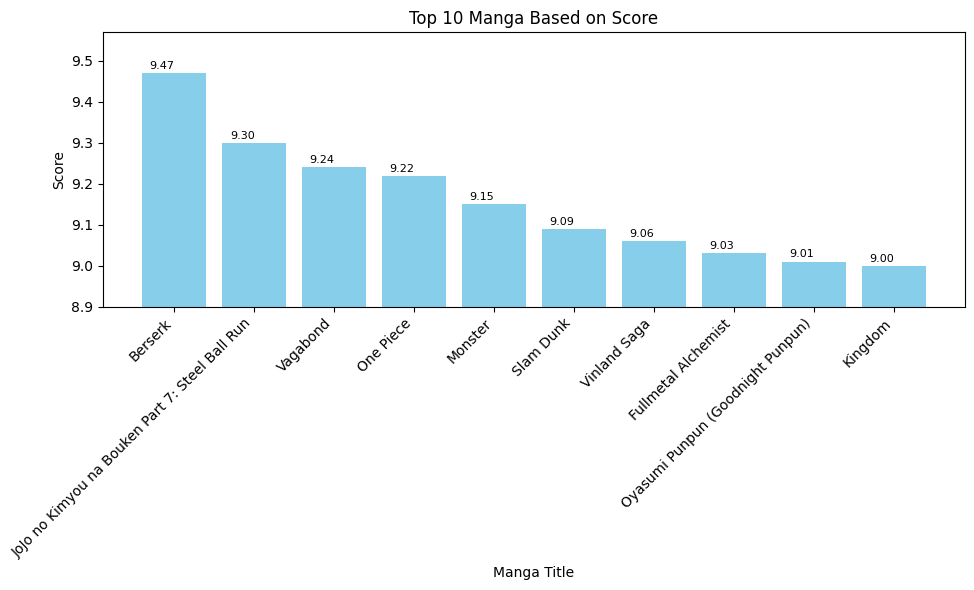

In [46]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_manga['Title'], top_10_manga['Score'], color='skyblue')

# Add scores as text on each bar
for bar, score in zip(bars, top_10_manga['Score']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{score:.2f}', ha='center', color='black', fontsize=8)

plt.xlabel('Manga Title')
plt.ylabel('Score')
plt.title('Top 10 Manga Based on Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Adjust y-axis range to highlight subtle differences
plt.ylim(min(top_10_manga['Score']) - 0.1, max(top_10_manga['Score']) + 0.1)

# Show the plot
plt.tight_layout()
plt.show()


**COMMENTS:**
+ The top 10 manga series encompass a wide range of genres, including action, adventure, drama, fantasy, mystery, supernatural, sports, and slice of life. This diversity suggests a broad appeal to readers with varying preferences.
+ All the listed manga have exceptionally high scores, indicating a consistent level of quality and popularity among the readers. Scores ranging from **9.00** to **9.47** demonstrate the overall excellence of these manga series.

 In summary, delving into the analysis of leading manga provides valuable insights for publishers, authors, and enthusiasts. Understanding the prevalent trends and preferences contributes to a comprehensive understanding of the dynamic landscape within the manga industry.

## Top 10 longest-running manga series

The question is asking for a list of the ten manga series that have been published over the longest periods of time, typically it's considered in terms of the number of years it has been in continuous publication, which reflects its popularity and enduring appeal.

In [47]:
top_10_manga = manga_df.nlargest(10, 'Time from release (months)')
top_10_manga[['Title','Time from release (months)']]

,Title,Time from release (months)
2865,Faust,887
1064,Golgo 13,660
5853,Tokeijikake no Ringo (Clockwork Apple),640
1660,Kinnikuman,535
2843,Guin Saga (The Guin Saga),530
3718,Crystal☆Dragon,513
2128,Shuna no Tabi (Shuna's Journey),486
2338,Kochira Katsushikaku Kameari Kouenmae Hashutsujo,480
2699,Munou no Hito (The Man Without Talent),462
1288,Magic Kaito,438


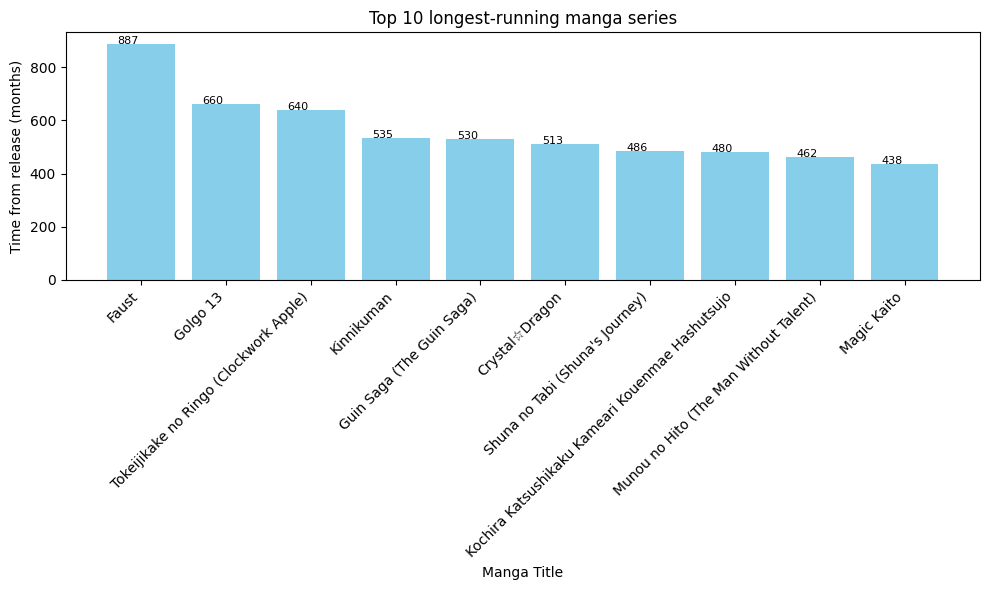

In [48]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_manga['Title'], top_10_manga['Time from release (months)'], color='skyblue')

# Add scores as text on each bar
for bar, months in zip(bars, top_10_manga['Time from release (months)']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{months}', ha='center', color='black', fontsize=8)

plt.xlabel('Manga Title')
plt.ylabel('Time from release (months)')
plt.title('Top 10 longest-running manga series')
plt.xticks(rotation=45, ha='right')  

# # Adjust y-axis range to highlight subtle differences
# plt.ylim(min(top_10_manga['Time from release (months)']) - 0.1, max(top_10_manga['Time from release (months)']) + 0.1)

plt.tight_layout()
plt.show()


**COMMENTS:**
+ The graph highlights the remarkable longevity of certain manga series, with the top 10 having been in continuous publication for extended periods. This suggests a sustained interest and popularity among readers over the years.
+ `Faust` stands out as the longest-running manga series in terms of the time from release. This series has been in continuous publication for an impressive **887** months, indicating a substantial and lasting presence in the manga landscape.
+ Analyzing the longevity of manga series provides valuable insights into the trends and dynamics of the manga industry. It reflects not only the creativity of mangaka but also the ability of certain series to capture and maintain the interest of readers over an extended period.
+ The extended publication periods of these manga series suggest not only popularity but also a cultural impact. Manga with long publication histories often become ingrained in popular culture and may influence subsequent generations of manga creators.

In summary, the data on the top 10 longest-running manga series offers a glimpse into the enduring success and influence of certain titles in the manga industry. It reflects the diverse tastes of readers and the ability of certain series to stand the test of time.

## Top 10 most favorite manga series

Analyzing the top 10 most favorite manga series is essential for understanding the dynamic landscape of the manga industry, guiding content creation, and making informed business decisions. It provides a comprehensive view of reader preferences, cultural influence, and market trends within the ever-evolving world of manga.

In [49]:
top_10_manga = manga_df.nlargest(10, 'Favorite')
print(top_10_manga[['Title','Favorite']])

                                               Title  Favorite
0                                            Berserk    122841
3                                          One Piece    114531
40                                      Chainsaw Man     79578
113             Shingeki no Kyojin (Attack on Titan)     68999
9                  Oyasumi Punpun (Goodnight Punpun)     50732
129                                      Tokyo Ghoul     44253
621                                           Naruto     43636
1    JoJo no Kimyou na Bouken Part 7: Steel Ball Run     42864
59                                     Solo Leveling     40982
2                                           Vagabond     40158


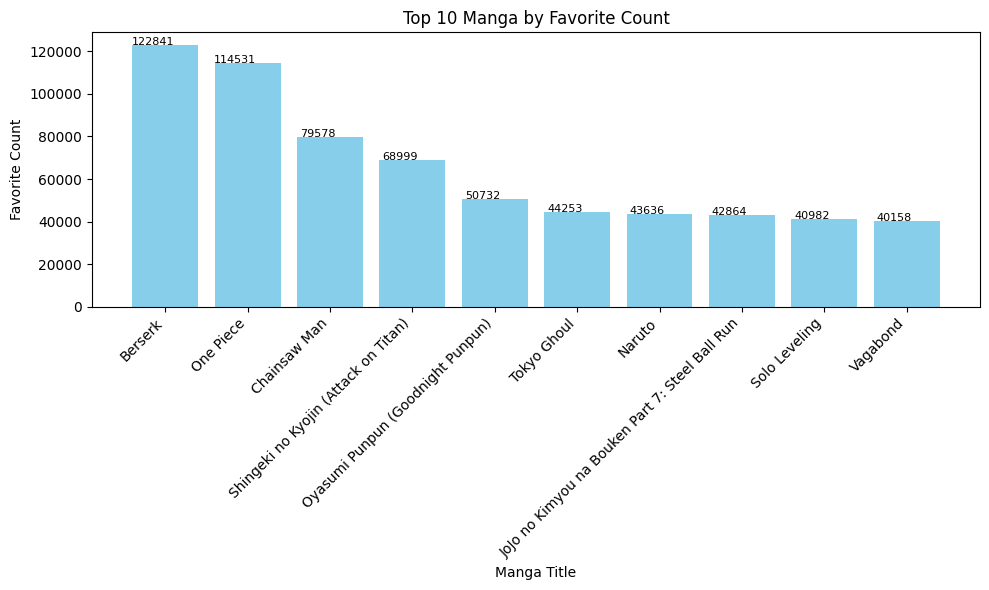

In [50]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_manga['Title'], top_10_manga['Favorite'], color='skyblue')

# Add scores as text on each bar
for bar, fav in zip(bars, top_10_manga['Favorite']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{fav}', ha='center', color='black', fontsize=8)

plt.title('Top 10 Manga by Favorite Count')
plt.xlabel('Manga Title')
plt.ylabel('Favorite Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show()

**COMMENTS:**
+ `Berserk` stands out as the clear leader in terms of favorites, with an exceptionally high count of **122,789**. This suggests an immense and dedicated fanbase, highlighting the series' impact and lasting appeal.
+ The high number of favorites reflects strong community engagement, with readers actively expressing their appreciation for these manga series. 

In summary, the data on the top 10 most favorite manga series provides valuable insights into reader preferences, the enduring popularity of certain series, and the diverse genres that captivate manga enthusiasts. Understanding these favorites is crucial for publishers, authors, and industry stakeholders seeking to engage with and cater to the preferences of the manga-reading community.

## Save processed data

Following the exploration and preprocessing of the data, it is imperative to preserve the processed data for subsequent stages. This entails saving the refined dataset to ensure its availability and readiness for the next phase of the analysis.

In [51]:
manga_df.to_csv('../data/processed_comic.csv', index=False)